In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 

In [13]:
movies = pd.read_csv("movies.csv")


Pregunta 1

Estas son las variables que no aportan información a la generación de grupos, esto ya que son cualitativas

In [14]:
#se seleccionan y se muestran las variables cualitativas que no aportaran en la creacion de los grupos
variables_cualitativas = movies.select_dtypes(exclude=[np.number])
for col in variables_cualitativas.columns:
    print(col)

genres
homePage
productionCompany
productionCompanyCountry
productionCountry
video
director
actors
actorsPopularity
actorsCharacter
originalTitle
title
originalLanguage
releaseDate
castWomenAmount
castMenAmount


Estas son las variables normalizadas que se utilizarán para calcular los grupos


In [15]:
#Se elimina id del dataframe ya que aunque sea numerica, es cualitativa ya que solo se utiliza como identificador y no para calculos
movies.drop('id', inplace=True, axis=1)
#se seleccionan las variables cuantitativas
variables_cuantitativas = movies._get_numeric_data()
#se normalizan
variables_cuantitativas_normalizadas=(variables_cuantitativas-variables_cuantitativas.min())/(variables_cuantitativas.max()-variables_cuantitativas.min())
print(variables_cuantitativas_normalizadas)


        budget   revenue   runtime  popularity   voteAvg  voteCount  \
0     0.010526  0.001495  0.130667    0.001449  0.505747   0.067431   
1     0.055263  0.004263  0.146667    0.000465  0.597701   0.007211   
2     0.028947  0.272333  0.161333    0.008347  0.793103   0.539091   
3     0.247368  0.330261  0.133333    0.011349  0.747126   0.517329   
4     0.144737  0.237910  0.189333    0.004751  0.827586   0.716017   
...        ...       ...       ...         ...       ...        ...   
9995  0.000000  0.000000  0.133333    0.001081  0.632184   0.003475   
9996  0.000000  0.000000  0.129333    0.042496  0.022989   0.000032   
9997  0.000000  0.000000  0.149333    0.048943  0.551724   0.000942   
9998  0.000000  0.000000  0.078667    0.000471  0.540230   0.000000   
9999  0.000669  0.000089  0.000000    0.006930  0.390805   0.000065   

      genresAmount  productionCoAmount  productionCountriesAmount  \
0           0.1250            0.022472                   0.006452   
1        

Pregunta2


Estadístico de Hopkins Tendencia a 0, con 0.02


In [19]:
random.seed(150)
print(pyclustertend.hopkins(variables_cuantitativas_normalizadas,len(variables_cuantitativas_normalizadas)))

0.021079289071549035


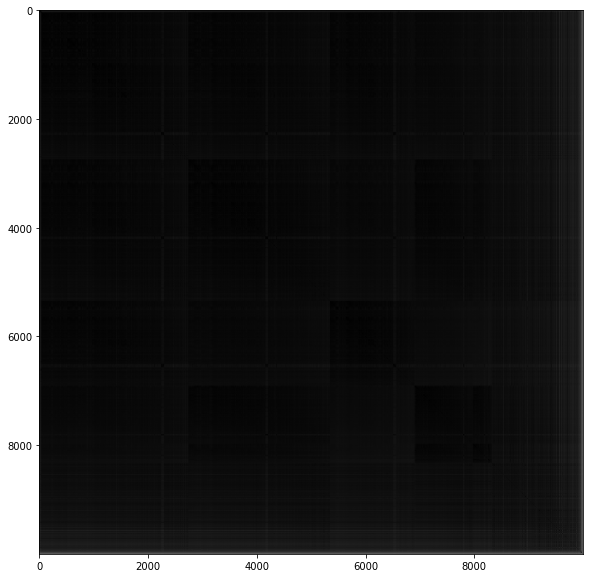

In [21]:
X_scale=sklearn.preprocessing.scale(variables_cuantitativas_normalizadas)
pyclustertend.vat(X_scale)
